### 21-05-2020


### Objectives 
* Data Analysis 
* Building model for prediction 
* Hyper parameter tuning 
* Deployment Basics 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel("C:\\Users\\saket\\Downloads\default of credit card clients.xls")

In [3]:
data.head(5)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
columns = list(data.loc[0].values)

In [5]:
columns

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [6]:
data = data[1:]

In [7]:
data.head(3)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [8]:
data.columns = columns

In [9]:
data.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [10]:
data.index = data.ID

In [11]:
data.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [12]:
data.drop(columns=['ID'], inplace=True)

In [13]:
data.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                       30000 non-null  object
 8   PAY_4                       30000 non-null  object
 9   PAY_5                       30000 non-null  object
 10  PAY_6                       30000 non-null  object
 11  BILL_AMT1                   30000 non-null  object
 12  BILL_AMT2                   30000 non-null  object
 13  BILL_AMT3                   30000 non-null  ob

### Prediction Objectives 
* we want to predict from data if a person will default next month or not 

In [15]:
data.rename(columns={'default payment next month':'def_next_month'}, inplace=True)

In [16]:
data.sample(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_next_month
ID,,,,,,,,,,,,,,,,,,,,,
12089,250000,1,3,1,46,0,0,0,0,-1,...,13896,79740,70097,21343,1238,1235,79788,2148,18253,0
23425,300000,2,1,2,31,-1,-1,-1,-1,-1,...,9215,154926,126482,19099,17865,9243,154975,0,29390,0
9487,350000,1,1,2,32,-1,-1,0,0,-1,...,4389,1717,4066,4983,15084,2028,1725,4086,2476,0
13015,50000,2,2,2,23,0,0,0,0,0,...,19893,20314,18810,2559,1969,684,713,672,670,0
10603,50000,2,3,1,36,0,0,0,0,0,...,17808,13765,14038,2500,11000,600,500,502,521,0


In [17]:
data.def_next_month.value_counts()

0    23364
1     6636
Name: def_next_month, dtype: int64

### Observation about target column 
* the data contains imbalanced classes 

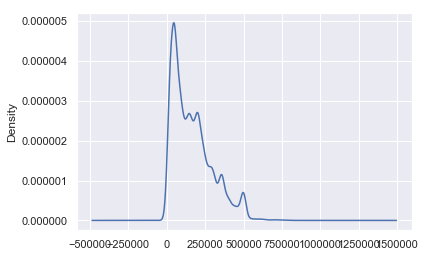

In [18]:
data.LIMIT_BAL.plot.kde()

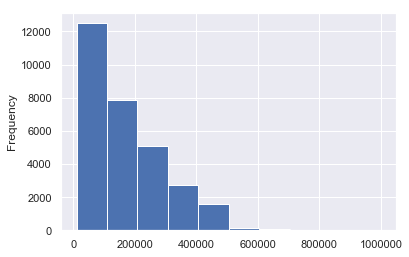

In [19]:
data.LIMIT_BAL.plot.hist()

In [20]:
data.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

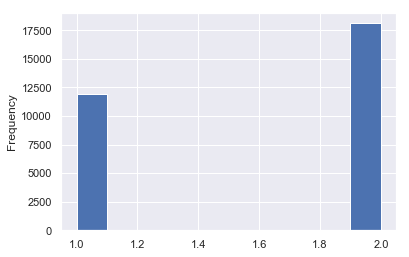

In [21]:
data.SEX.plot.hist()

In [22]:
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

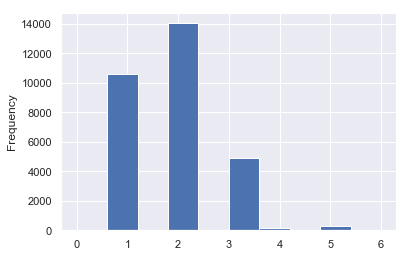

In [25]:
data.EDUCATION.plot.hist()

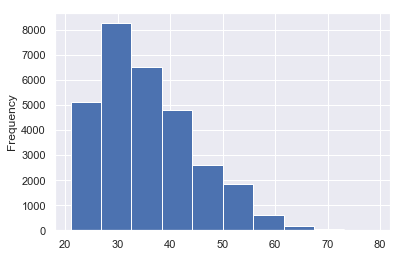

In [26]:
data.AGE.plot.hist()

In [27]:
payment_status = data.filter(regex='PAY_\d')

In [28]:
payment_status.PAY_0.value_counts()  

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

### In columns PAY_0..5 0/-1/-2 represents payments done
* Putting them all in same bucket, marking them 0. Since they paid
* -2,-1 means paid in advace

In [29]:
cols = list(payment_status.columns)

In [30]:
for col in cols:
    data[col] = data[col].map(lambda v: 0 if v < 0 else v)

In [31]:
data.sample(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_next_month
ID,,,,,,,,,,,,,,,,,,,,,
3753,360000,2,1,1,31,0,0,0,0,0,...,4232,3189,7511,0,0,4237,16,7548,4105,0
11574,20000,2,1,2,24,0,0,2,0,0,...,8027,8892,9739,3000,1000,1000,1000,1000,1000,0
11188,200000,2,2,1,39,0,2,0,0,0,...,0,3331,0,0,5881,20,3331,0,8447,0
233,50000,1,2,1,26,0,0,0,0,0,...,2624,45567,46557,0,0,2624,45567,1747,2000,0
21867,80000,2,1,2,26,0,0,0,0,0,...,1608,1453,4287,2991,1500,1608,1453,4287,6000,0


### Base lining model

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
trainX, testX, trainY, testY = train_test_split(data.drop(columns=['def_next_month']), data.def_next_month)

In [35]:
dt = DecisionTreeClassifier()

In [36]:
trainY.unique()

array([0, 1], dtype=object)

In [37]:
for col in data.columns:
    print(data[col].unique())

[20000 120000 90000 50000 500000 100000 140000 200000 260000 630000 70000
 250000 320000 360000 180000 130000 450000 60000 230000 160000 280000
 10000 40000 210000 150000 380000 310000 400000 80000 290000 340000 300000
 30000 240000 470000 480000 350000 330000 110000 420000 170000 370000
 270000 220000 190000 510000 460000 440000 410000 490000 390000 580000
 600000 620000 610000 700000 670000 680000 430000 550000 540000 1000000
 530000 710000 560000 520000 750000 640000 16000 570000 590000 660000
 720000 327680 740000 800000 760000 690000 650000 780000 730000]
[2 1]
[2 1 3 5 4 6 0]
[1 2 3 0]
[24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
[2 0 1 3 4 8 7 5 6]
[2 0 3 5 7 4 1 6 8]
[0 2 3 4 6 7 1 5 8]
[0 2 3 4 5 7 6 1 8]
[0 2 3 5 4 7 8 6]
[0 2 3 6 4 7 8 5]
[3913 2682 29239 ... 1683 -1645 47929]
[3102 1725 14027 ... 3356 78379 48905]
[689 2682 13559 ... 2758 76304 4976

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   LIMIT_BAL       30000 non-null  object
 1   SEX             30000 non-null  object
 2   EDUCATION       30000 non-null  object
 3   MARRIAGE        30000 non-null  object
 4   AGE             30000 non-null  object
 5   PAY_0           30000 non-null  int64 
 6   PAY_2           30000 non-null  int64 
 7   PAY_3           30000 non-null  int64 
 8   PAY_4           30000 non-null  int64 
 9   PAY_5           30000 non-null  int64 
 10  PAY_6           30000 non-null  int64 
 11  BILL_AMT1       30000 non-null  object
 12  BILL_AMT2       30000 non-null  object
 13  BILL_AMT3       30000 non-null  object
 14  BILL_AMT4       30000 non-null  object
 15  BILL_AMT5       30000 non-null  object
 16  BILL_AMT6       30000 non-null  object
 17  PAY_AMT1        30000 non-null  object
 18  PAY_AM

In [39]:
for col in data.columns:
    data[col] = data[col].astype('int64')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   LIMIT_BAL       30000 non-null  int64
 1   SEX             30000 non-null  int64
 2   EDUCATION       30000 non-null  int64
 3   MARRIAGE        30000 non-null  int64
 4   AGE             30000 non-null  int64
 5   PAY_0           30000 non-null  int64
 6   PAY_2           30000 non-null  int64
 7   PAY_3           30000 non-null  int64
 8   PAY_4           30000 non-null  int64
 9   PAY_5           30000 non-null  int64
 10  PAY_6           30000 non-null  int64
 11  BILL_AMT1       30000 non-null  int64
 12  BILL_AMT2       30000 non-null  int64
 13  BILL_AMT3       30000 non-null  int64
 14  BILL_AMT4       30000 non-null  int64
 15  BILL_AMT5       30000 non-null  int64
 16  BILL_AMT6       30000 non-null  int64
 17  PAY_AMT1        30000 non-null  int64
 18  PAY_AMT2        30000 non-

In [41]:
trainX, testX, trainY, testY = train_test_split(data.drop(columns=['def_next_month']), data.def_next_month)

In [42]:
dt.fit(trainX, trainY)

DecisionTreeClassifier()

In [43]:
dt.score(testX,testY)

0.7194666666666667

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
y_pred = dt.predict(testX)

In [46]:
confusion_matrix(y_pred=y_pred, y_true=testY)

array([[4712, 1084],
       [1020,  684]], dtype=int64)

In [47]:
pd.DataFrame(confusion_matrix(y_pred=y_pred, y_true=testY), columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,4712,1084
Actual 1,1020,684


In [48]:
684/(1020+684)

0.4014084507042254

* What we understand from the above matrix is 1009 defaulters were not predicted, they will skip the checks & scrutiny of the bank
* In this data, out of 1020+684 defaulters, we missed predicting 1009 which is very bad
* We are able to catch only 40% defaulters

In [49]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [50]:
smote = SMOTE()

In [51]:
feature_s, target_s = smote.fit_sample(data.drop(columns=['def_next_month']), data.def_next_month)

In [52]:
trainX, testX, trainY, testY = train_test_split(feature_s, target_s)

In [53]:
dt = DecisionTreeClassifier()

In [54]:
dt.fit(trainX, trainY)

DecisionTreeClassifier()

In [55]:
y_pred = dt.predict(testX)

In [56]:
pd.DataFrame(confusion_matrix(y_pred=y_pred, y_true=testY), columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,4174,1627
Actual 1,1372,4509


In [57]:
dt.score(testX, testY)

0.7432802602294127

In [59]:
4502/(1372+4509)

0.7655160686958

The model now can predict 75% of defaulters

### Improving further  

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=3)

In [62]:
rf.fit(trainX, trainY)


RandomForestClassifier(n_jobs=3)

In [63]:
y_pred = rf.predict(testX)

In [64]:
pd.DataFrame(confusion_matrix(y_pred=y_pred, y_true=testY), columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,4966,835
Actual 1,1077,4804


In [66]:
4804/(1077+4804)

0.8168678796123108

__Feature Selection__


In [67]:
feature_cols = list(data.drop(columns=['def_next_month']).columns)

In [68]:
feature_imp = pd.Series(rf.feature_importances_, index= feature_cols)

In [69]:
top_features = list(feature_imp.sort_values(ascending=False)[:-5].index)

In [70]:
top_features

['PAY_0',
 'LIMIT_BAL',
 'BILL_AMT1',
 'AGE',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_2',
 'BILL_AMT2',
 'PAY_AMT3',
 'BILL_AMT3',
 'BILL_AMT4',
 'PAY_AMT6',
 'PAY_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT5',
 'MARRIAGE',
 'SEX']

In [71]:
feature_s, target_s = smote.fit_sample(data[top_features], data.def_next_month)

In [72]:
rf = RandomForestClassifier(n_estimators=1000, n_jobs=3)

In [73]:
rf.fit(trainX, trainY)

RandomForestClassifier(n_estimators=1000, n_jobs=3)

In [74]:
rf.score(testX,testY)

0.8404382811162472

In [75]:
y_pred = rf.predict(testX)

In [76]:
pd.DataFrame(confusion_matrix(y_pred=y_pred, y_true=testY), columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,4968,833
Actual 1,1031,4850


In [77]:
4850/(1031+4850)

0.824689678626084

### Hyper-parameters - Configuration of model, in random forest n_estimators
* Should I config n_estimators as 100,1000 or what
* With Hyper-parameter tuning we will try to fig out best configuration of ML algo